## Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
### 2) Data Collection

### 2.1 Import Data and Required Packages
####  Importing Libraries.

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Load the Student dataset

In [56]:
dataset = pd.read_csv("./data/stud.csv")
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Find Records in dataset

In [57]:
dataset.shape

(1000, 8)

Observation :- There are 1000 records in dataset with 8 features.

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [59]:
dataset.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Observation : There is no missing values identified in dataset

### 3.2 Check Duplicates

In [64]:
dataset.duplicated().sum()

0

Observation : There is no duplicate record in dataset

### 3.3 Check data types

In [65]:
# Check Null Values and Data Types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [66]:
dataset.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [67]:
dataset.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observations:
- Mean is nearly same for numerical columns. It is Inbetween 66 to 68
- Standard deviations are also very close, in between 14.5 - 15.2
- Minimum Score in math is 0, other exam min mark is much better than math.

### 3.7 Exploring Data

In [72]:
print("---------------------------------------------------------------------------------------------------------------------------------------")
print("Categories in 'gender' variable:     ",end=" " )
print(dataset['gender'].unique())
print("---------------------------------------------------------------------------------------------------------------------------------------")
print()

print("---------------------------------------------------------------------------------------------------------------------------------------")
print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(dataset['race_ethnicity'].unique())
print("---------------------------------------------------------------------------------------------------------------------------------------")
print()

print("---------------------------------------------------------------------------------------------------------------------------------------")
print("Categories in'parental level of education' variable:",end=" " )
print(dataset['parental_level_of_education'].unique())
print("---------------------------------------------------------------------------------------------------------------------------------------")
print()

print("---------------------------------------------------------------------------------------------------------------------------------------")
print("Categories in 'lunch' variable:     ",end=" " )
print(dataset['lunch'].unique())
print("---------------------------------------------------------------------------------------------------------------------------------------")
print()

print("---------------------------------------------------------------------------------------------------------------------------------------")
print("Categories in 'test preparation course' variable:     ",end=" " )
print(dataset['test_preparation_course'].unique())
print("---------------------------------------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------------------------------------
Categories in 'gender' variable:      ['female' 'male']
---------------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------------
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
---------------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------------
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
----

In [73]:
# define numerical & categorical columns
numeric_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

# print columns
print("---------------------------------------------------------------------------------------------------------------------------------------")
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print("---------------------------------------------------------------------------------------------------------------------------------------")
print()
print("---------------------------------------------------------------------------------------------------------------------------------------")
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))
print("---------------------------------------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------------------------------------
We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
---------------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------------
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
---------------------------------------------------------------------------------------------------------------------------------------


### 3.8 Adding columns for "Total Score" and "Average"

In [74]:
dataset['Total Score'] = dataset['math_score'] + dataset['reading_score'] + dataset['writing_score']
dataset['Average'] = dataset['Total Score'] / 3 
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [84]:
math_full = dataset[dataset['math_score'] == 100]['Average'].count()
reading_full = dataset[dataset['reading_score'] == 100]['Average'].count()
writing_full = dataset[dataset['writing_score'] == 100]['Average'].count()

print('---------------------------------------------------')
print(f"{math_full} students got out off marks in math")
print('---------------------------------------------------')
print()

print('---------------------------------------------------')
print(f"{reading_full} students got out off marks in Reading")
print('---------------------------------------------------')
print()

print('---------------------------------------------------')
print(f"{writing_full} students got out off marks in Writing")
print('---------------------------------------------------')

---------------------------------------------------
7 students got out off marks in math
---------------------------------------------------

---------------------------------------------------
17 students got out off marks in Reading
---------------------------------------------------

---------------------------------------------------
14 students got out off marks in Writing
---------------------------------------------------


In [85]:
math_failed = dataset[dataset['math_score'] < 35]['Average'].count()
reading_failed = dataset[dataset['reading_score'] < 35]['Average'].count()
writing_failed = dataset[dataset['writing_score'] < 35]['Average'].count()

print('---------------------------------------------------')
print(f"{math_failed} students failed in math test")
print('---------------------------------------------------')
print()

print('---------------------------------------------------')
print(f"{reading_failed} students failed in reading test")
print('---------------------------------------------------')
print()

print('---------------------------------------------------')
print(f"{writing_failed} students failed in math test")
print('---------------------------------------------------')

---------------------------------------------------
22 students failed in math test
---------------------------------------------------

---------------------------------------------------
15 students failed in reading test
---------------------------------------------------

---------------------------------------------------
17 students failed in math test
---------------------------------------------------


Observations:
- More students got out off marks in reading test.
- More students failed in math test.

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

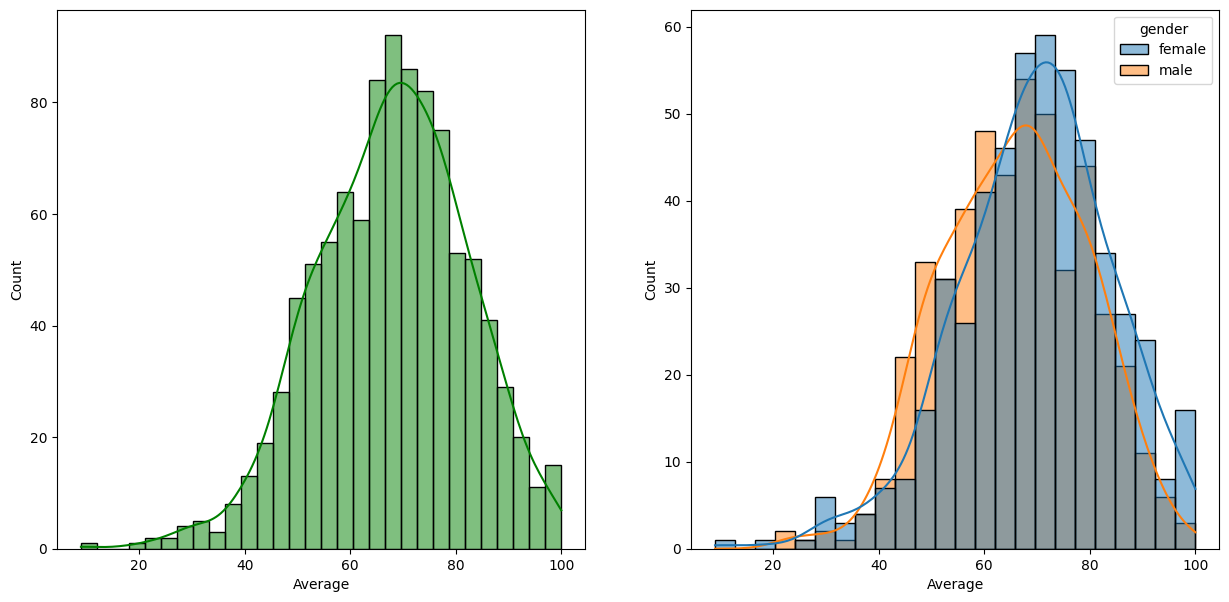

In [87]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=dataset, x='Average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=dataset, x='Average', kde=True, hue='gender')
plt.show()

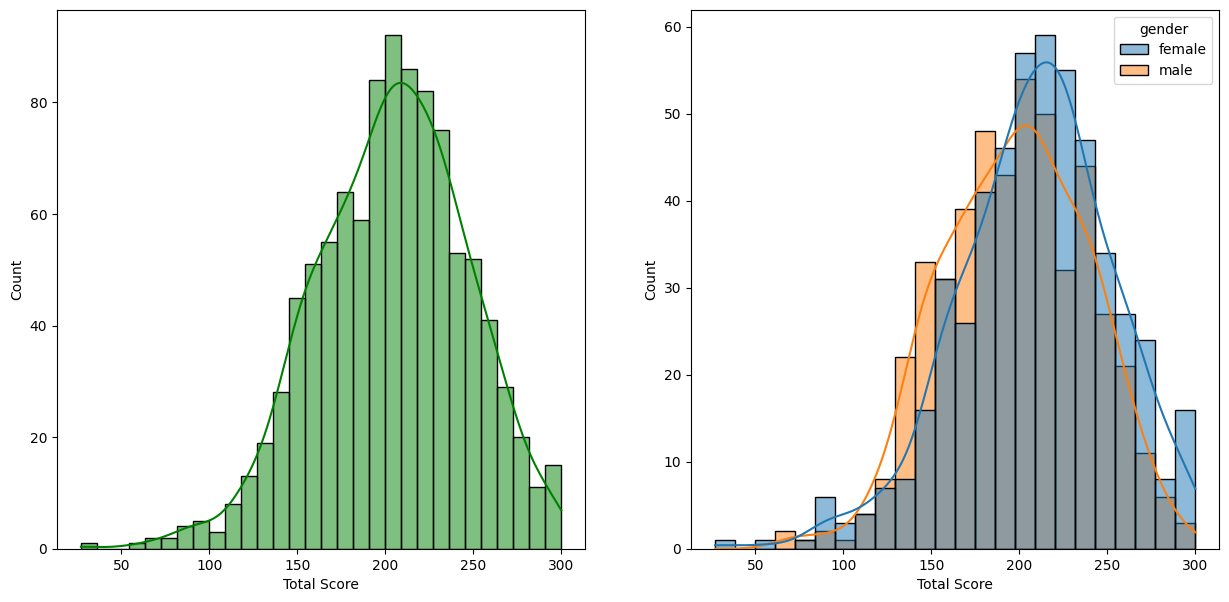

In [89]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=dataset, x='Total Score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=dataset, x='Total Score', kde=True, hue='gender')
plt.show()

Observation:
- Trend shows female students perform better than male students

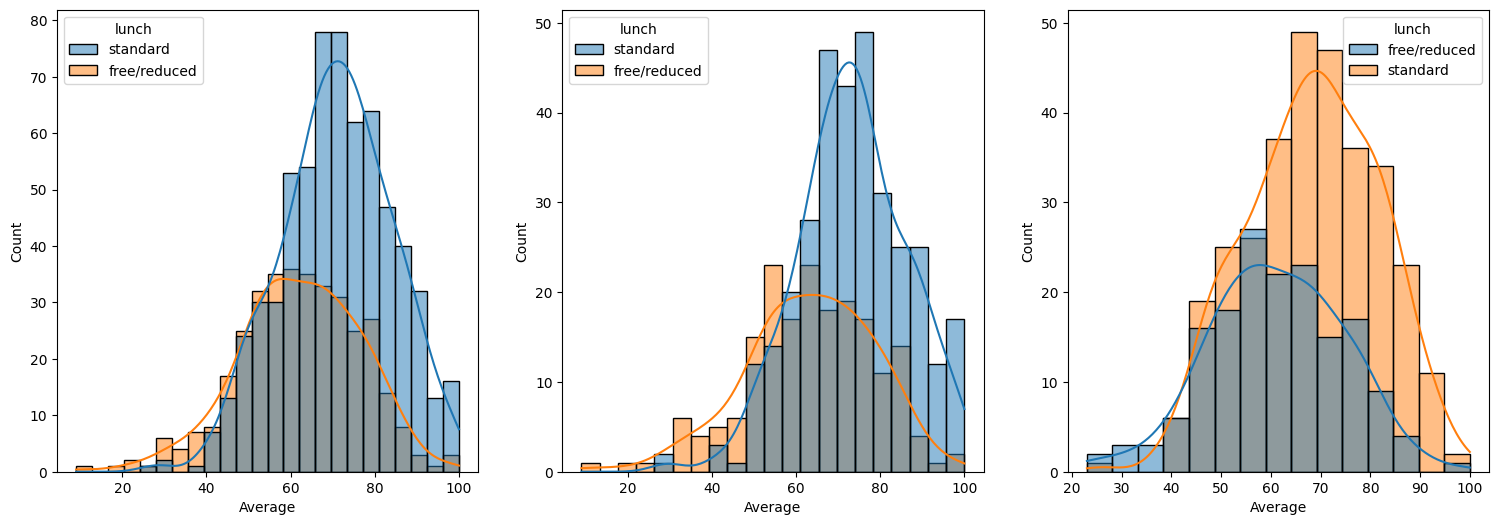

In [91]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=dataset,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=dataset[dataset.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=dataset[dataset.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

Observation:
- Standard lunch helps student to perform better in test
- Standard lunch helps for performing better in test both male and female students

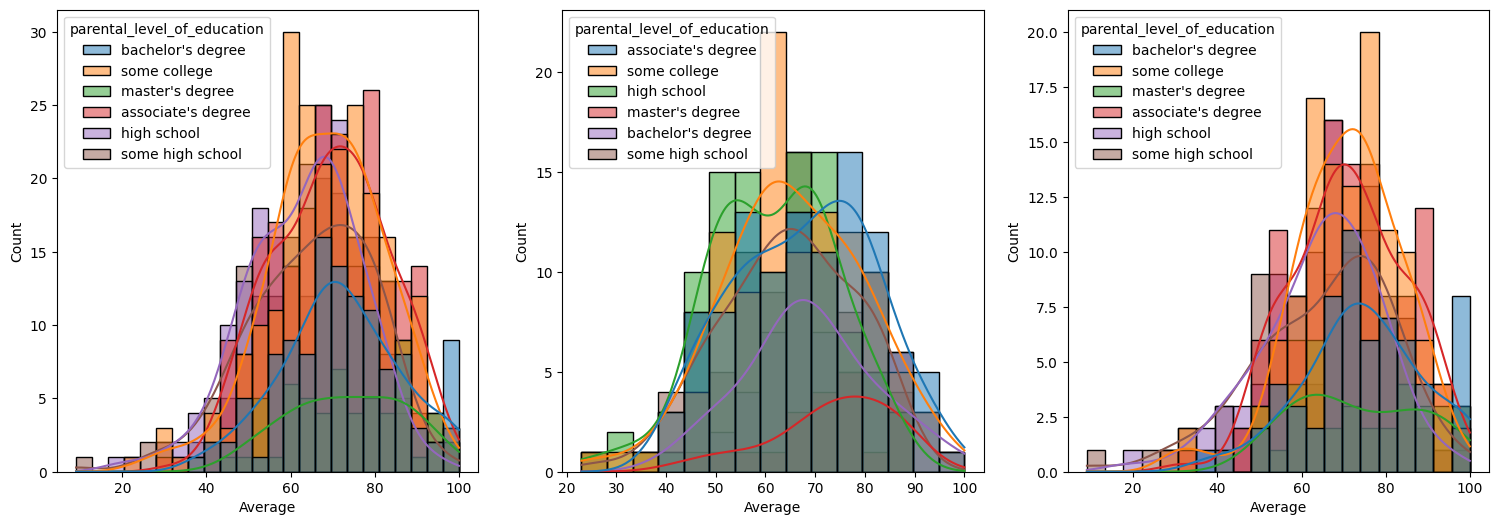

In [93]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=dataset,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=dataset[dataset.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=dataset[dataset.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()

Observation:
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

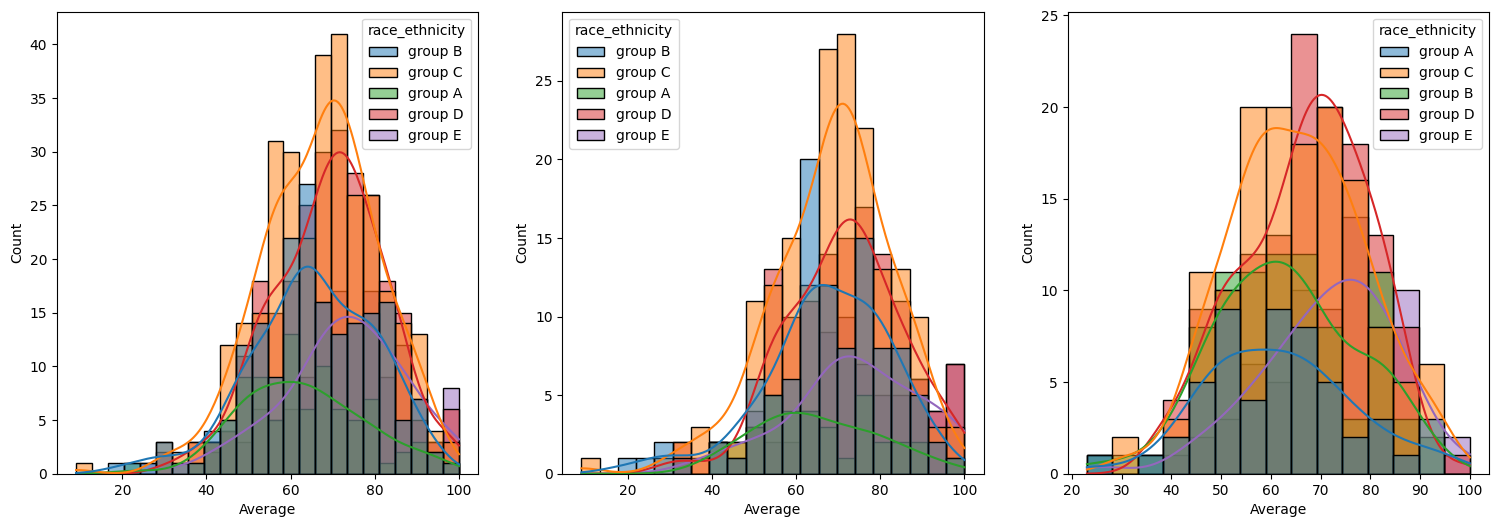

In [95]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=dataset,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=dataset[dataset.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=dataset[dataset.gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.show()

Observation:
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

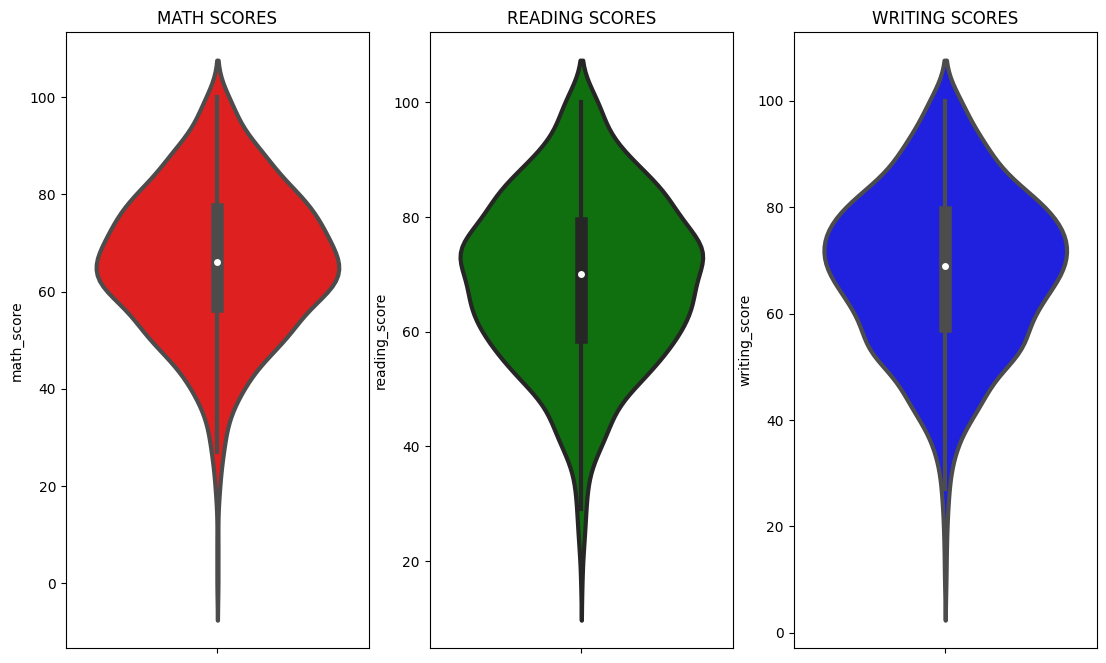

In [97]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=dataset,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=dataset,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=dataset,color='blue',linewidth=3)
plt.show()

Observation:
- From above three plots its clearly visible that most of the students score 60-80 in math and in reading and writing scored in between 50-80.

#### 4.3 Multivariate analysis using pieplot

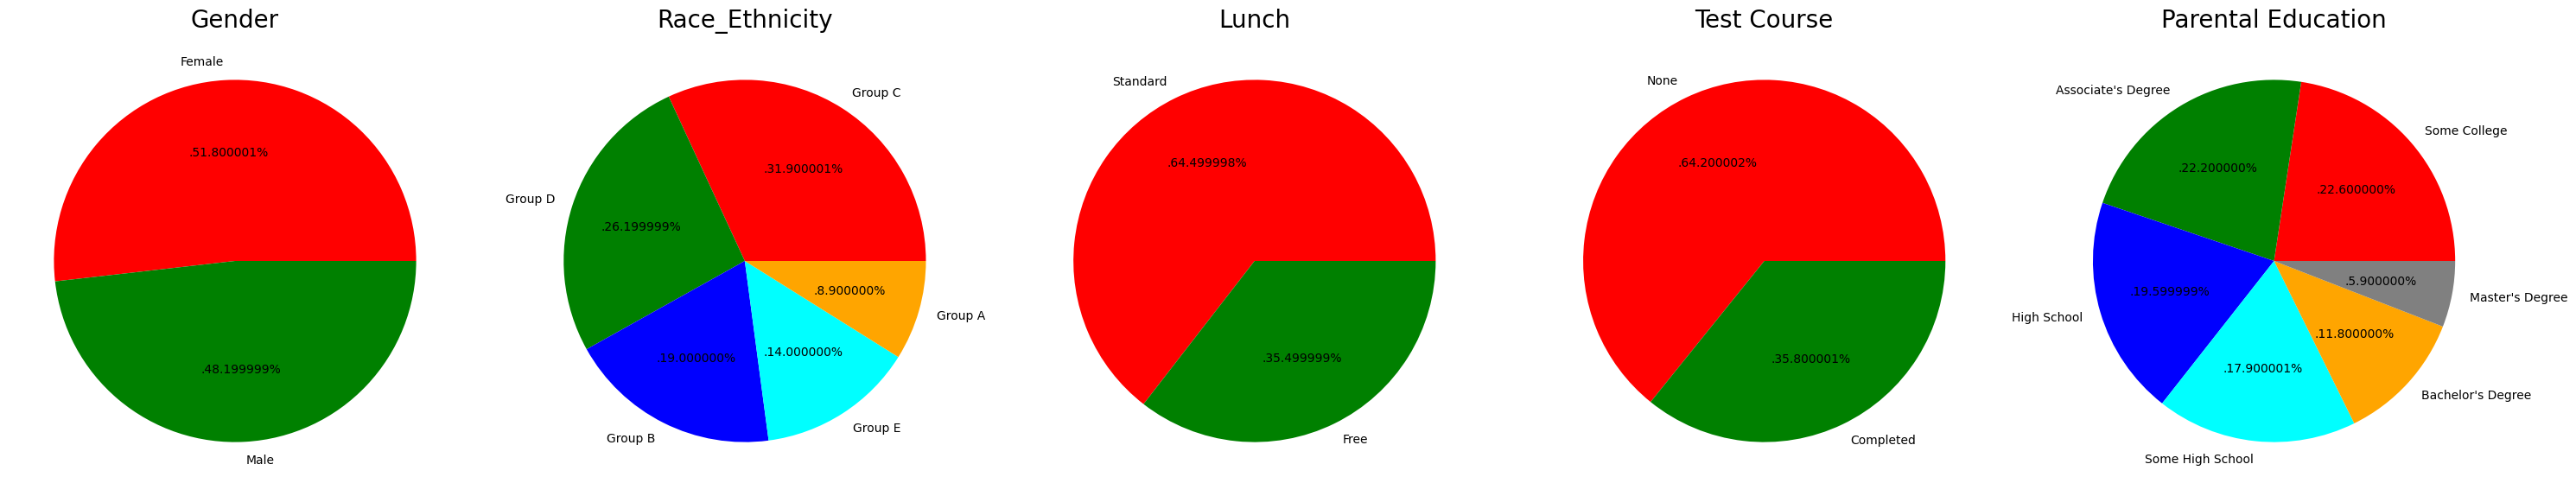

In [98]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = dataset['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = dataset['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = dataset['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = dataset['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = dataset['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Observation:
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

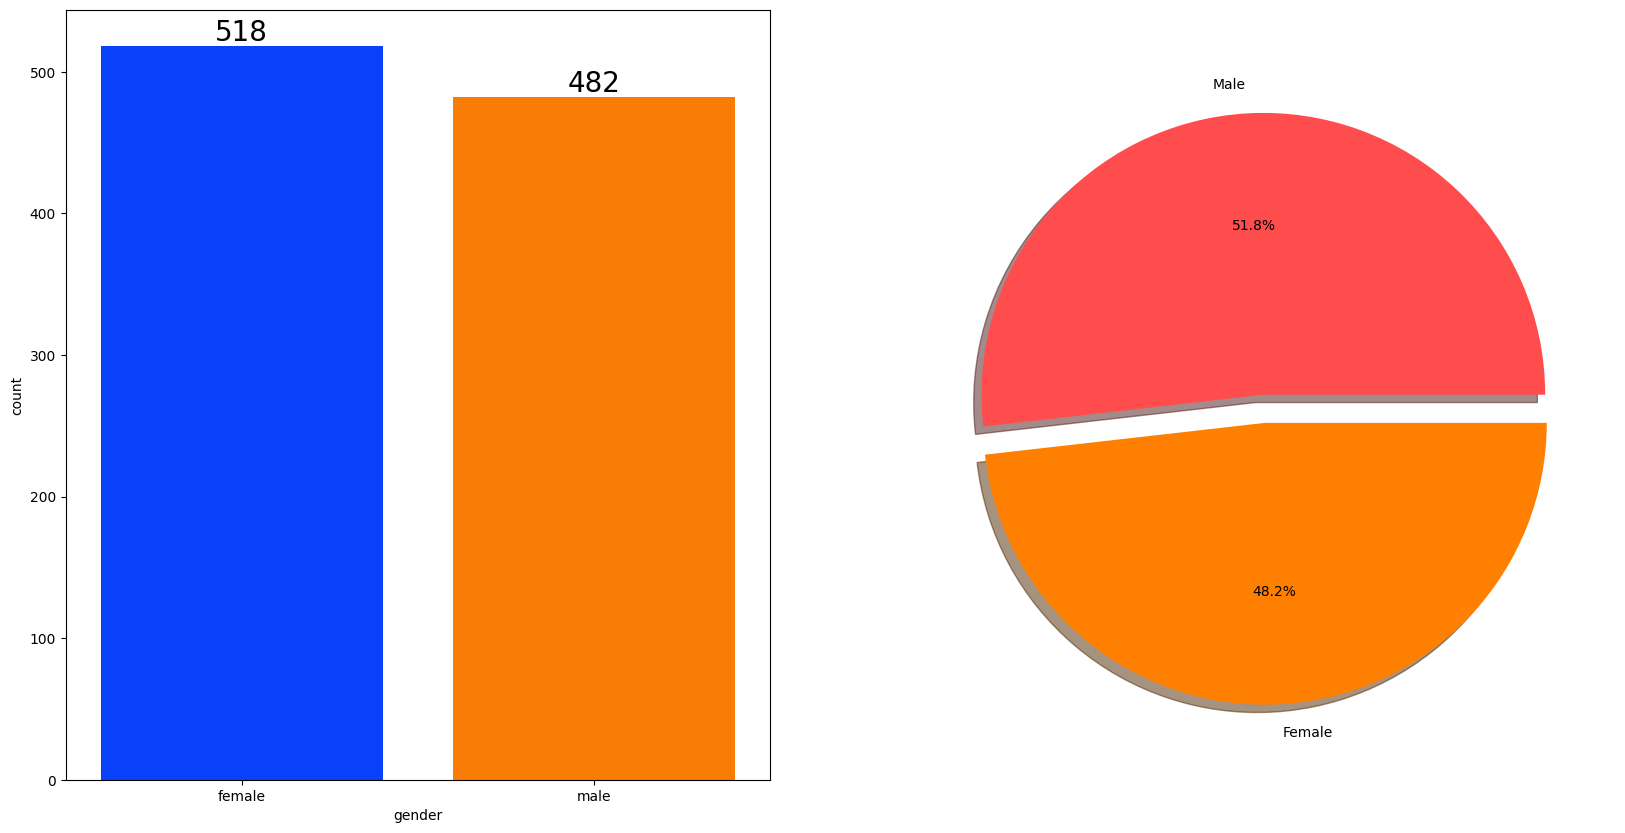

In [99]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=dataset['gender'],data=dataset,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=dataset['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Observation:
- Gender has balanced data with female students are 518 (52%) and male students are 482 (48%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [105]:
# gender_group = dataset.groupby('gender')
# gender_group

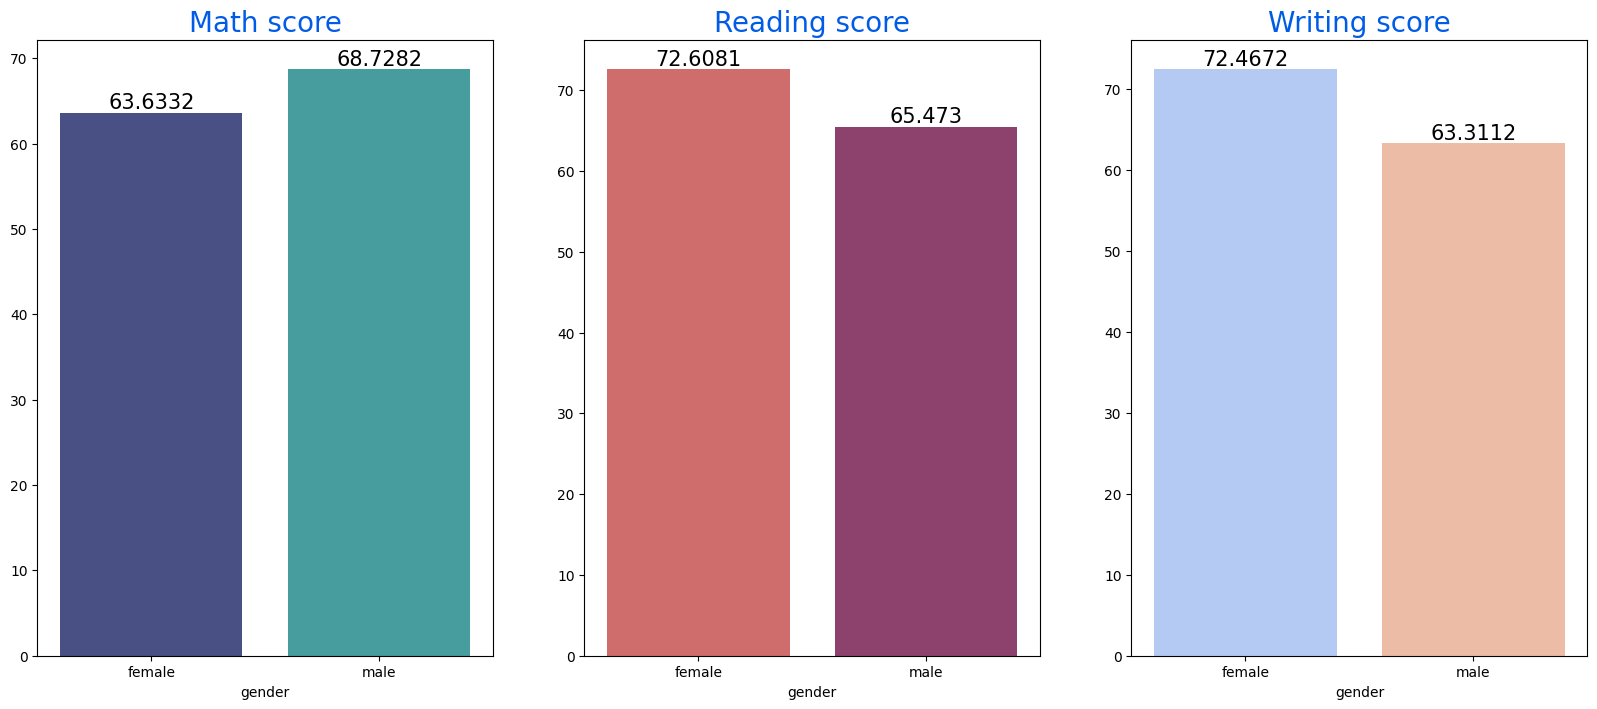

In [109]:
Group_data1=dataset.groupby('gender')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data1['math_score'].mean().index,y=Group_data1['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data1['reading_score'].mean().index,y=Group_data1['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data1['writing_score'].mean().index,y=Group_data1['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Observation:
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

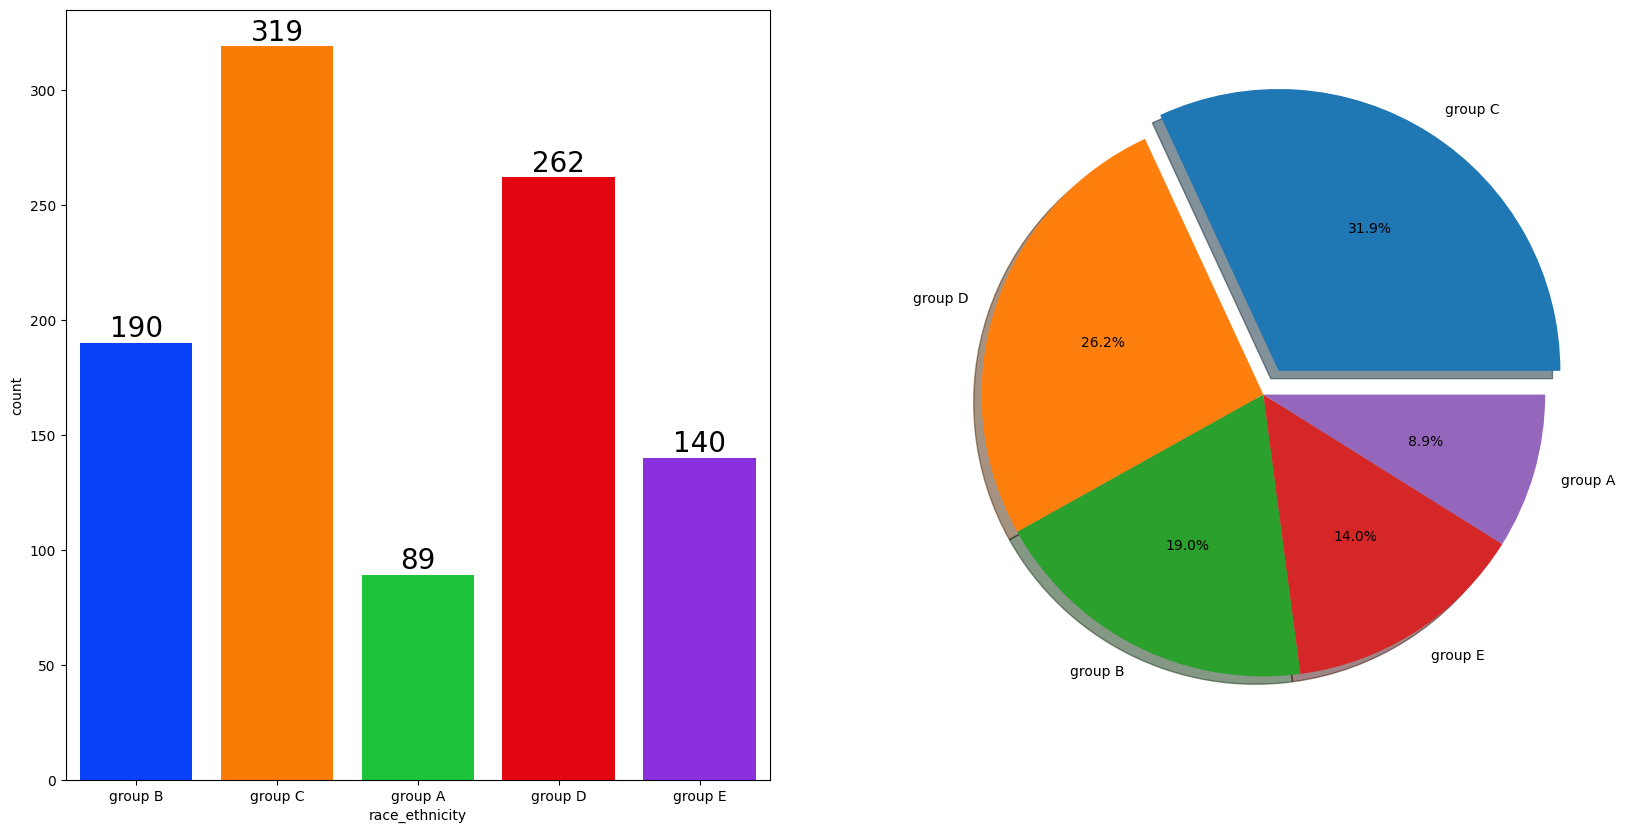

In [106]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=dataset['race_ethnicity'], data=dataset, palette = 'bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = dataset['race_ethnicity'].value_counts(),labels=dataset['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Observation :
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

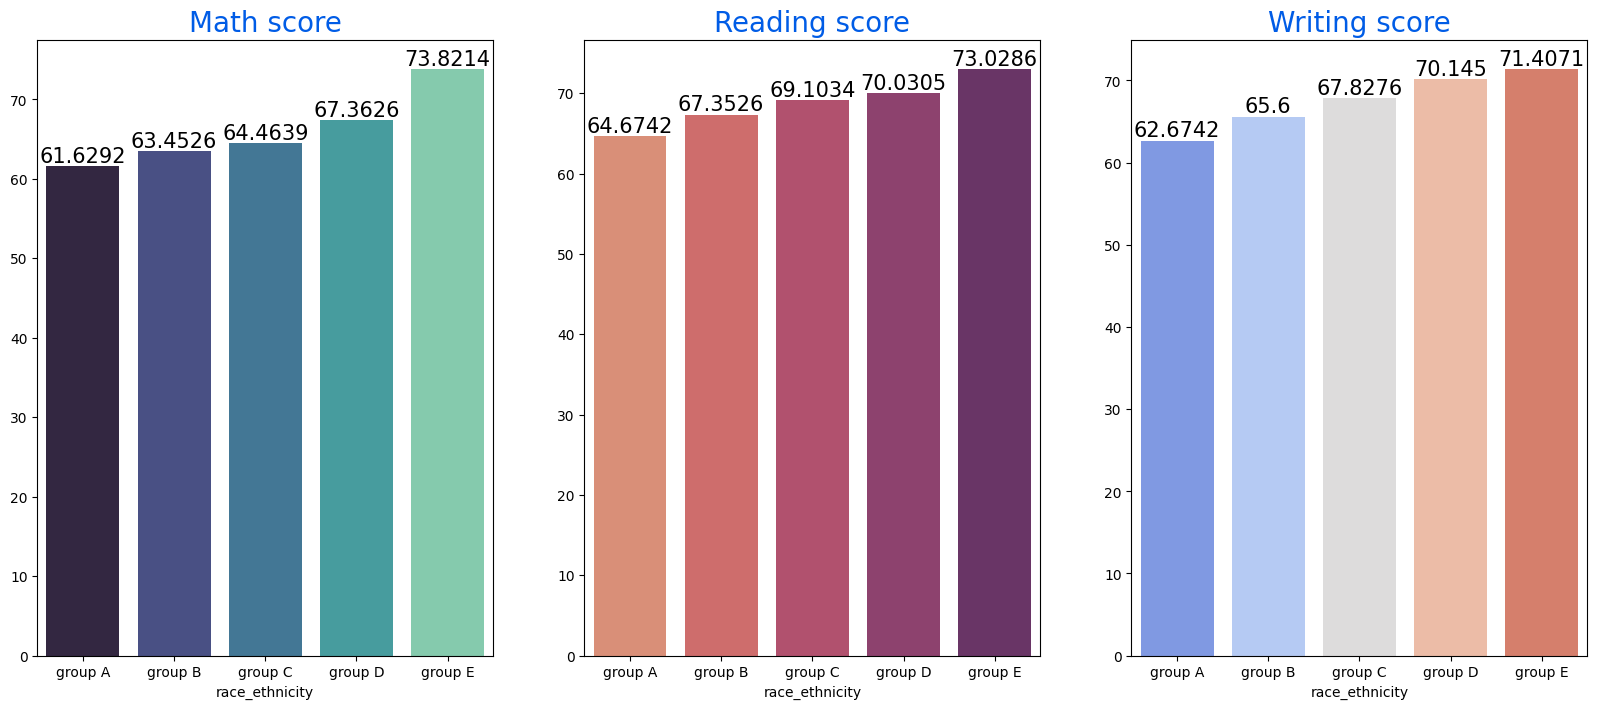

In [107]:
Group_data2=dataset.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Observation : 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

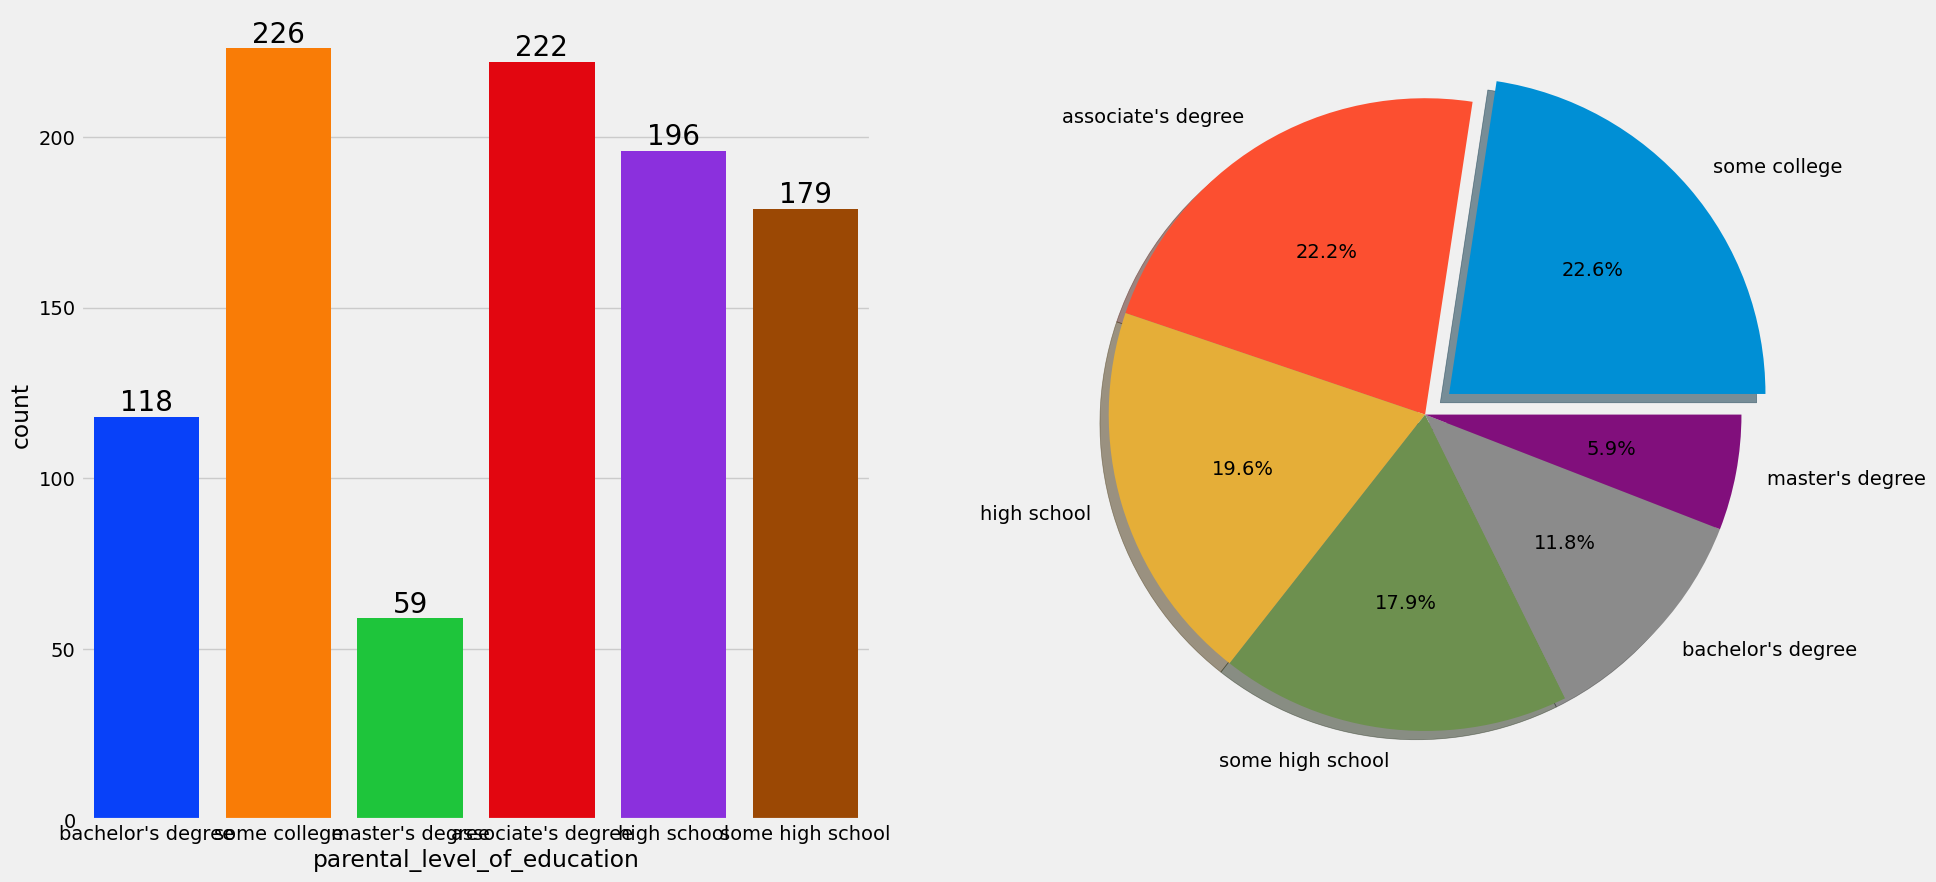

In [116]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=dataset['parental_level_of_education'], data=dataset, palette = 'bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = dataset['parental_level_of_education'].value_counts(),labels=dataset['parental_level_of_education'].value_counts().index,explode=[0.1,0,0,0,0, 0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Observation: 
- Largest number of parents are from some college & Associative's degree.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

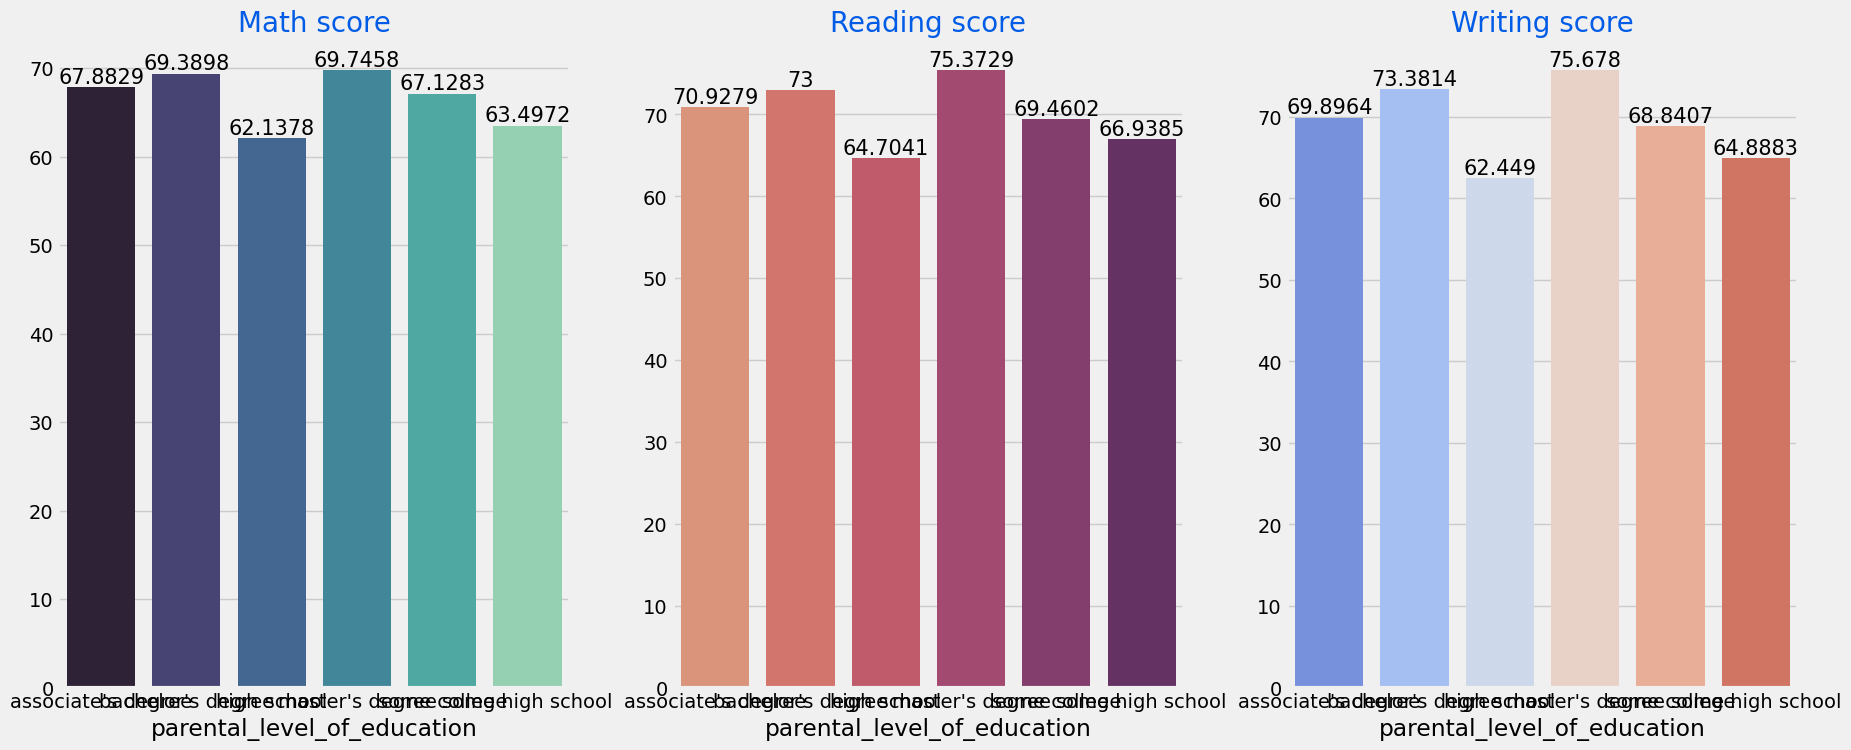

In [117]:
Group_data3=dataset.groupby('parental_level_of_education')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data3['math_score'].mean().index,y=Group_data3['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3['reading_score'].mean().index,y=Group_data3['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3['writing_score'].mean().index,y=Group_data3['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Observation 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

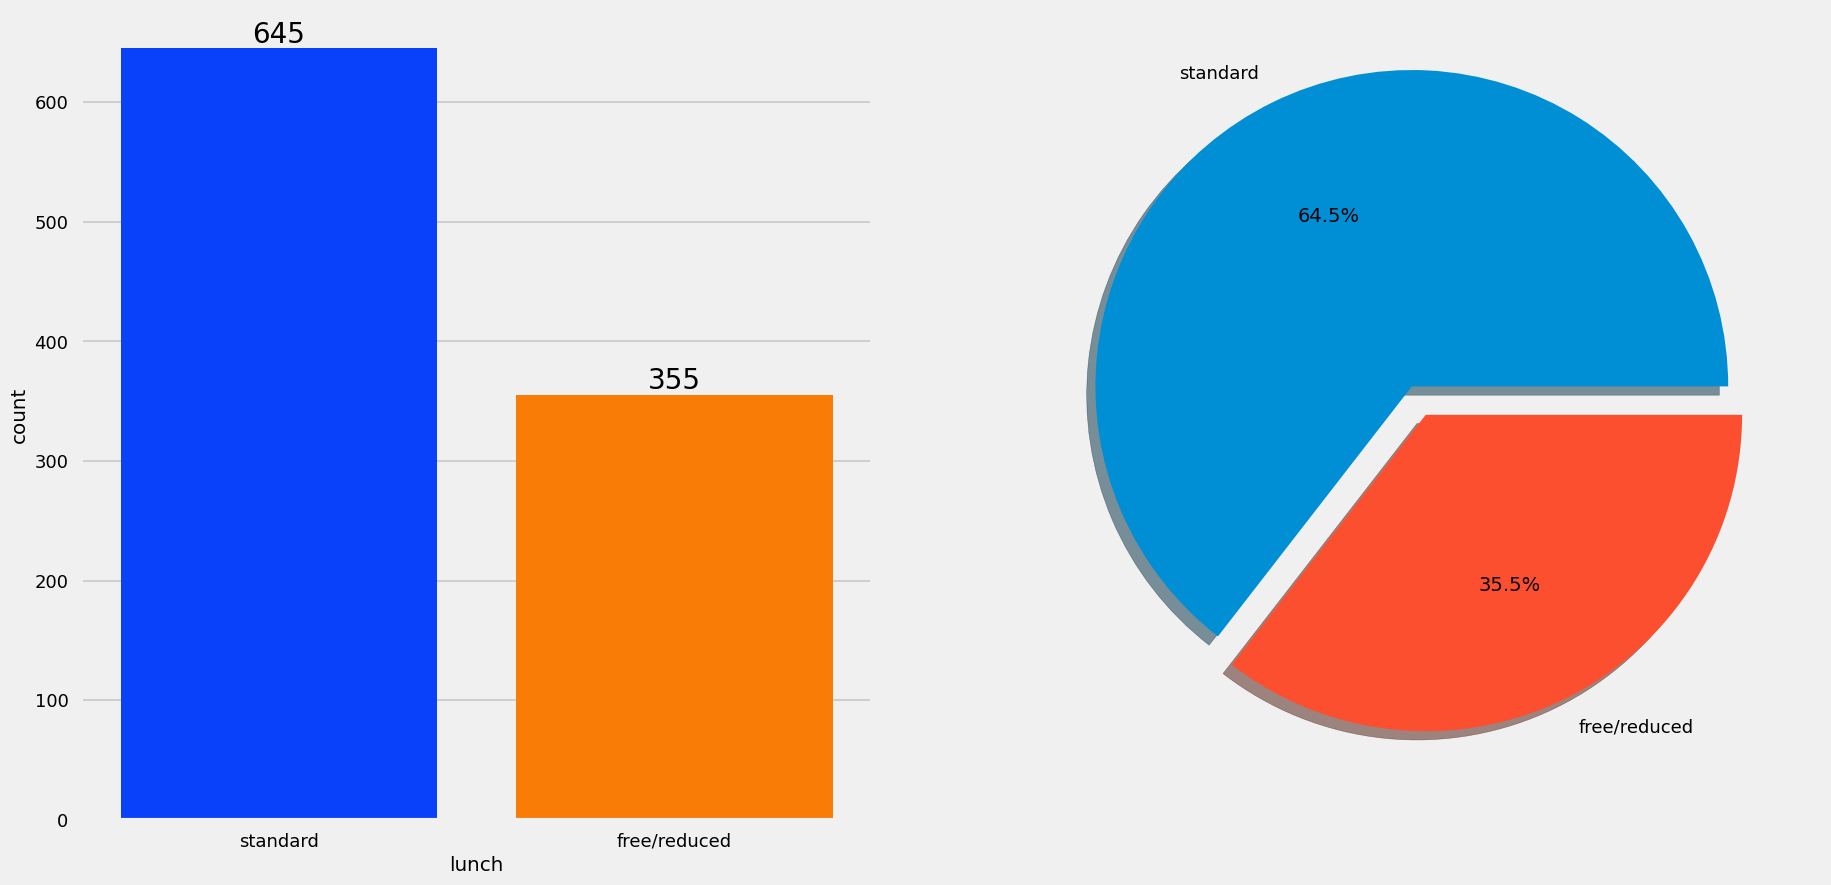

In [121]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=dataset['lunch'], data=dataset, palette = 'bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = dataset['lunch'].value_counts(),labels=dataset['lunch'].value_counts().index,explode=[0.1,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Observation 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

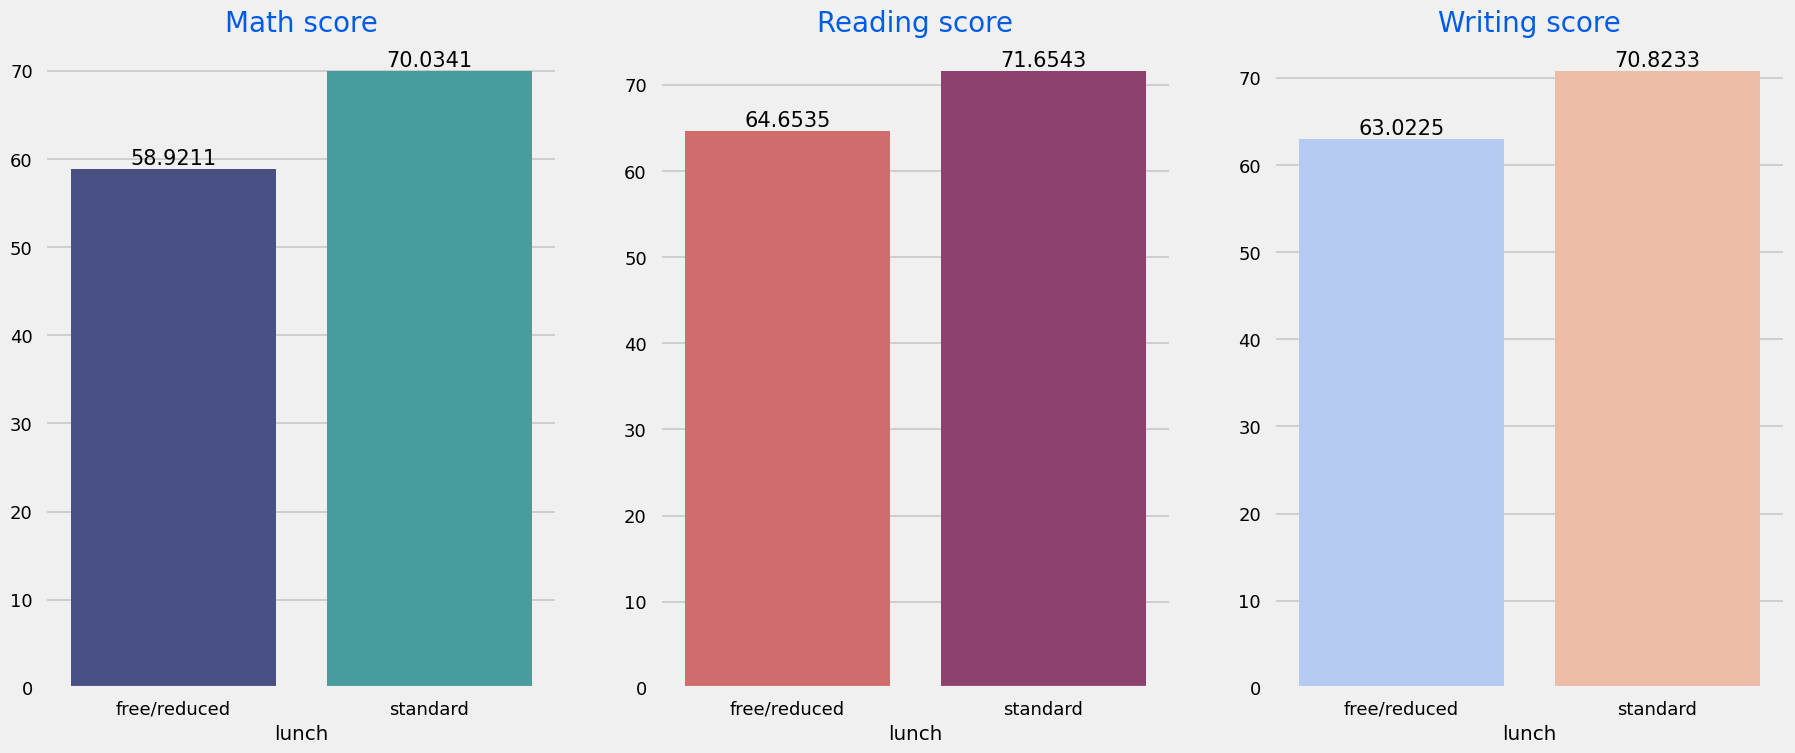

In [122]:
Group_data4=dataset.groupby('lunch')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data4['math_score'].mean().index,y=Group_data4['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data4['reading_score'].mean().index,y=Group_data4['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data4['writing_score'].mean().index,y=Group_data4['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Observation 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

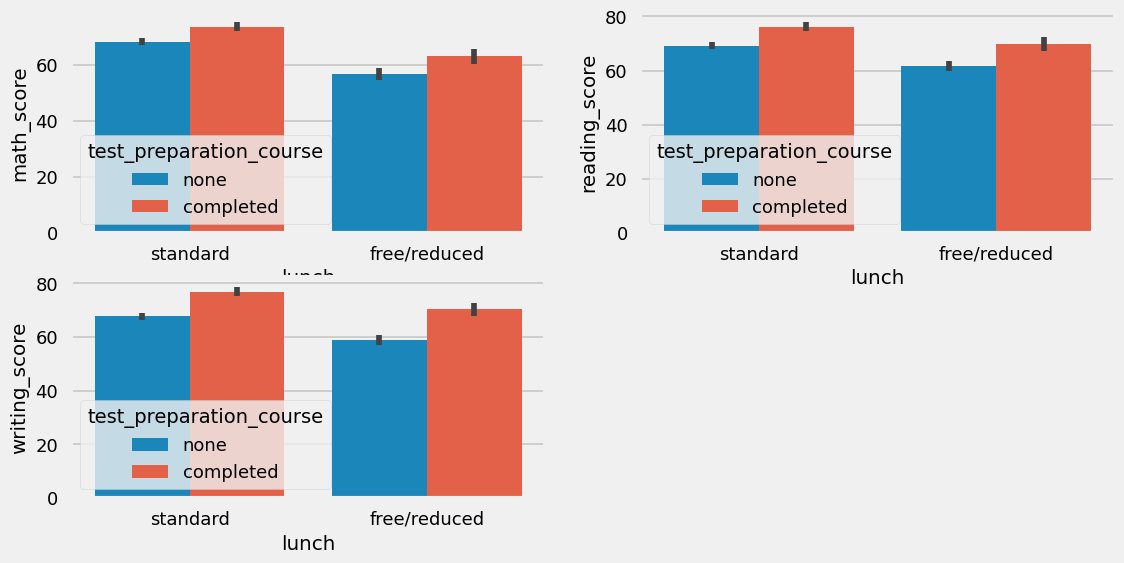

In [124]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=dataset['lunch'], y=dataset['math_score'], hue=dataset['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=dataset['lunch'], y=dataset['reading_score'], hue=dataset['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=dataset['lunch'], y=dataset['writing_score'], hue=dataset['test_preparation_course'])

#### Observation  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

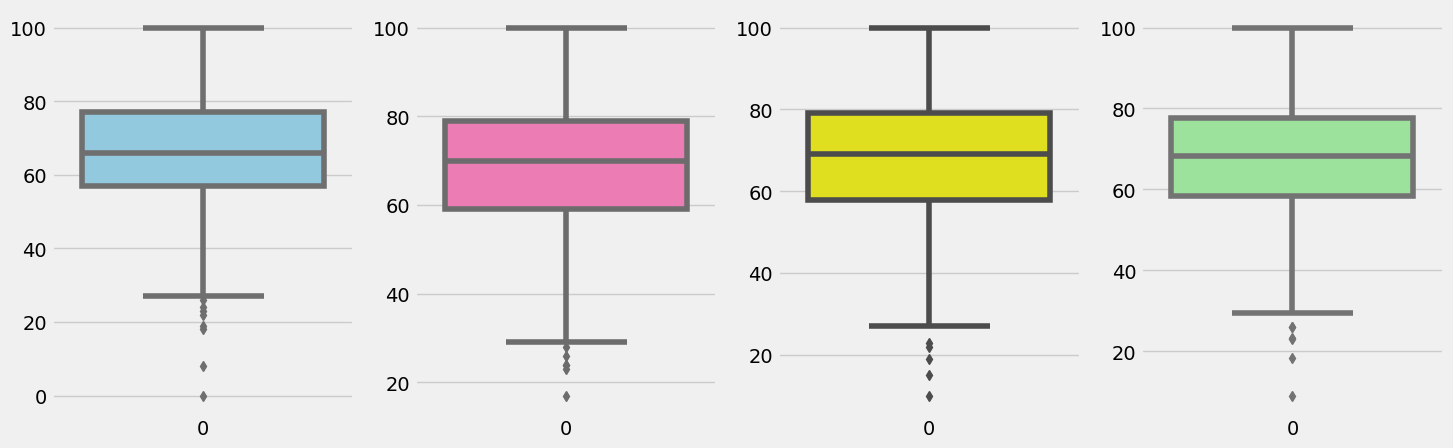

In [113]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(dataset['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(dataset['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(dataset['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(dataset['Average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

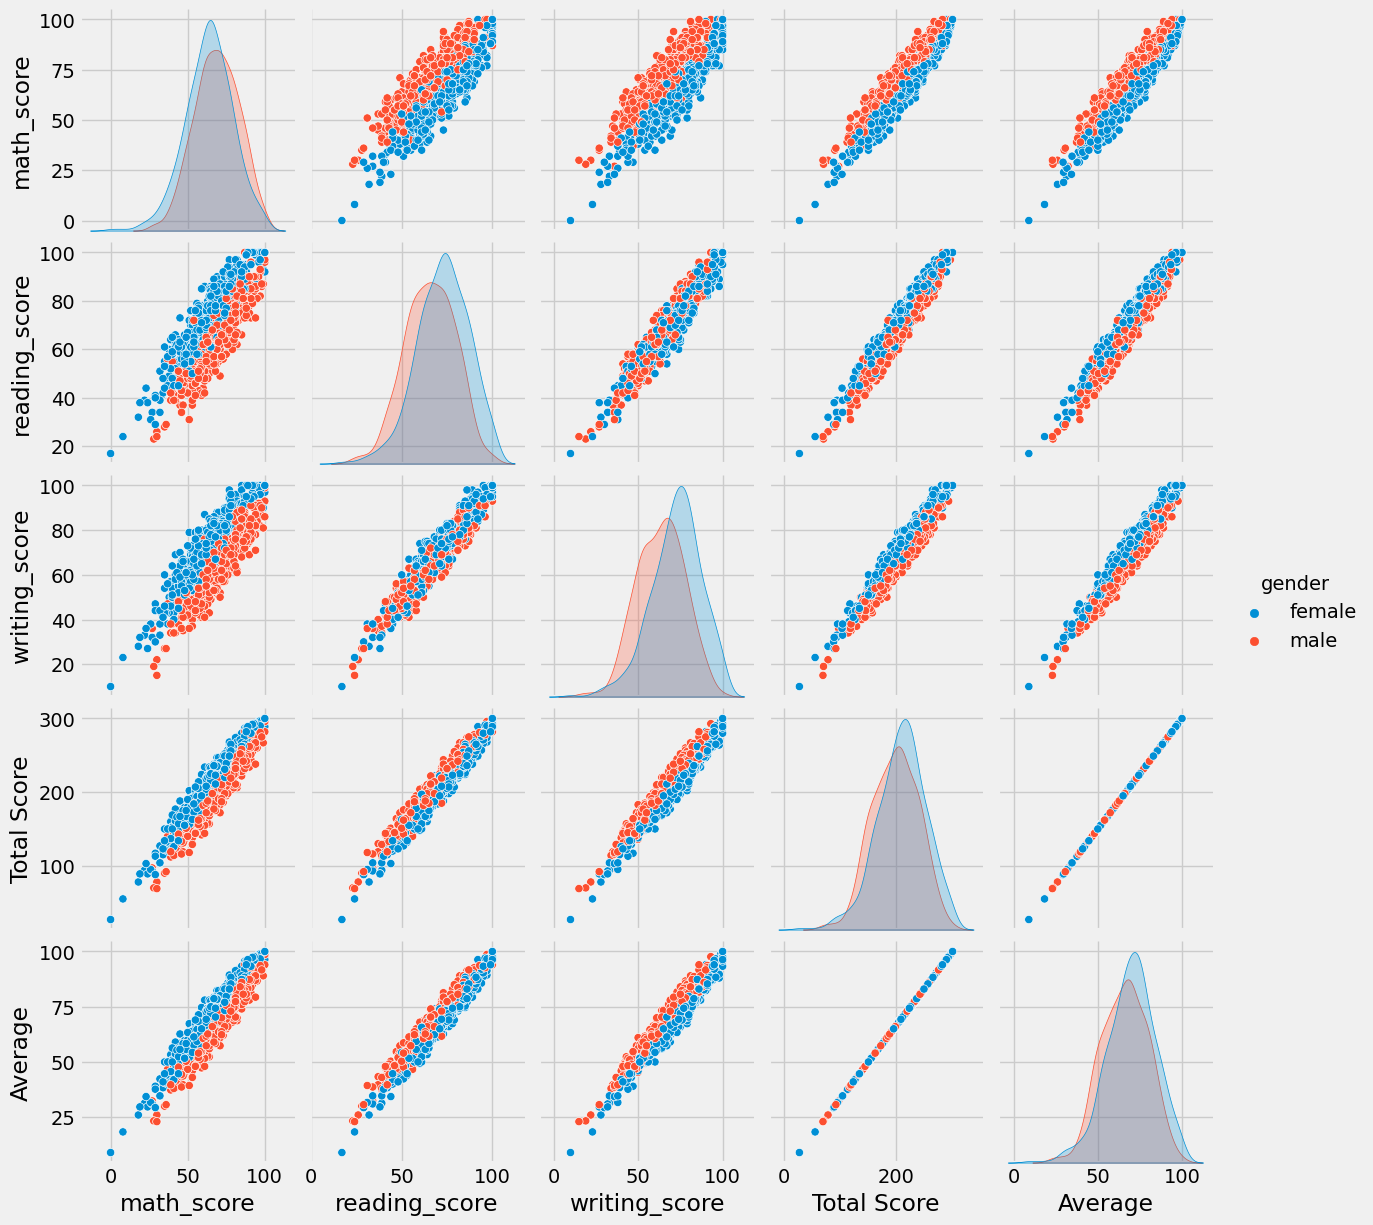

In [114]:
sns.pairplot(dataset,hue = 'gender')
plt.show()

#### Observation:
- From the above plot it is clear that all the scores increase linearly with each other.